In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression, LogisticRegression 

from sklearn.svm import SVC, SVR

from sklearn.neighbors import KNeighborsClassifier , KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [2]:
homevalues = pd.read_csv("datafiles/single_family_home_values.csv")
homevalues.dropna(inplace = True)

In [3]:
homevalues["lastSaleDate"] = pd.to_datetime(homevalues["lastSaleDate"])
homevalues["priorSaleDate"] = pd.to_datetime(homevalues["priorSaleDate"])
homevalues.dropna(inplace = True)

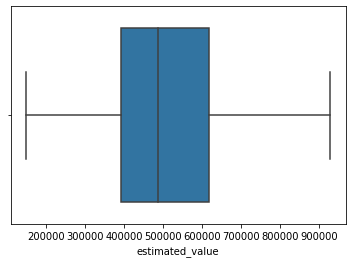

In [4]:
upperOutlierCutoff = homevalues["estimated_value"].quantile(0.90)

homevalues = homevalues[homevalues["estimated_value"] <= upperOutlierCutoff]
homevalues = homevalues[homevalues["lastSaleAmount"] <= upperOutlierCutoff]
homevalues.shape
sns.boxplot(homevalues.estimated_value)

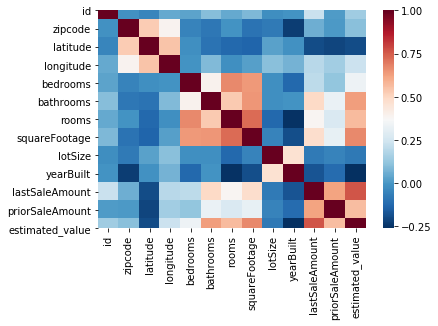

In [5]:
hvcorr = homevalues.corr()
sns.heatmap(hvcorr, cmap="RdBu_r")

In [6]:
X = homevalues[["bedrooms","bathrooms","rooms","squareFootage","lotSize", "yearBuilt", "priorSaleAmount"]]

In [7]:
X_columns = X.columns

bedrooms
mean: 2.5817322200985817
stddev: 0.7793126628484083
bathrooms
mean: 1.9612212051101499
stddev: 0.8207753103729264
rooms
mean: 5.774771149783724
stddev: 1.477759758505976
squareFootage
mean: 1290.3199879287797
stddev: 468.0752253767643
lotSize
mean: 5449.150387284982
stddev: 1693.9419312407072
yearBuilt
mean: 1926.7733628407605
stddev: 27.154343832653364
priorSaleAmount
mean: 211646.88421687958
stddev: 163893.88429008616


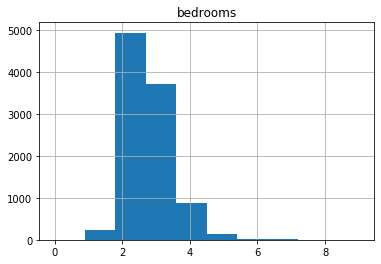

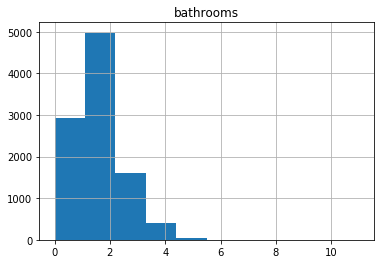

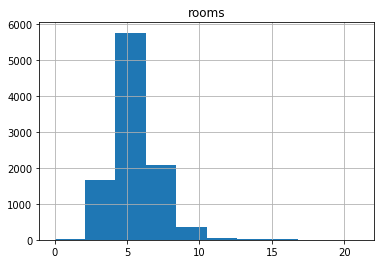

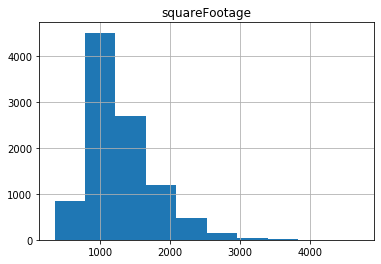

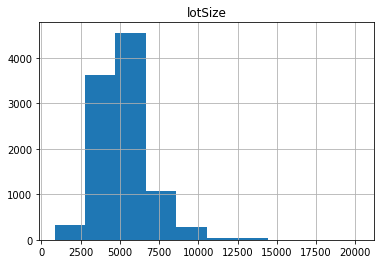

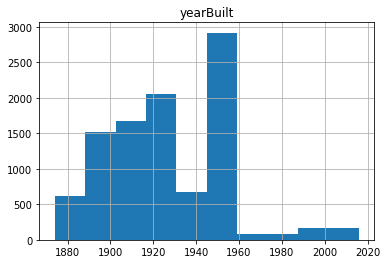

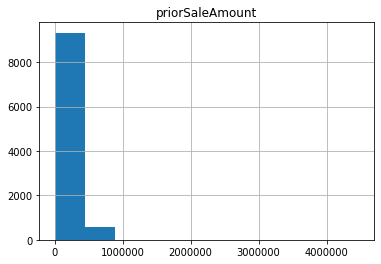

In [8]:
for i in X_columns:
    print("========")
    print(i)
    
    X.loc[:, [i]].hist()
    
    print("mean: " + str(X.loc[:, i].mean()))
    print("stddev: " + str(X.loc[:, i].std()))   

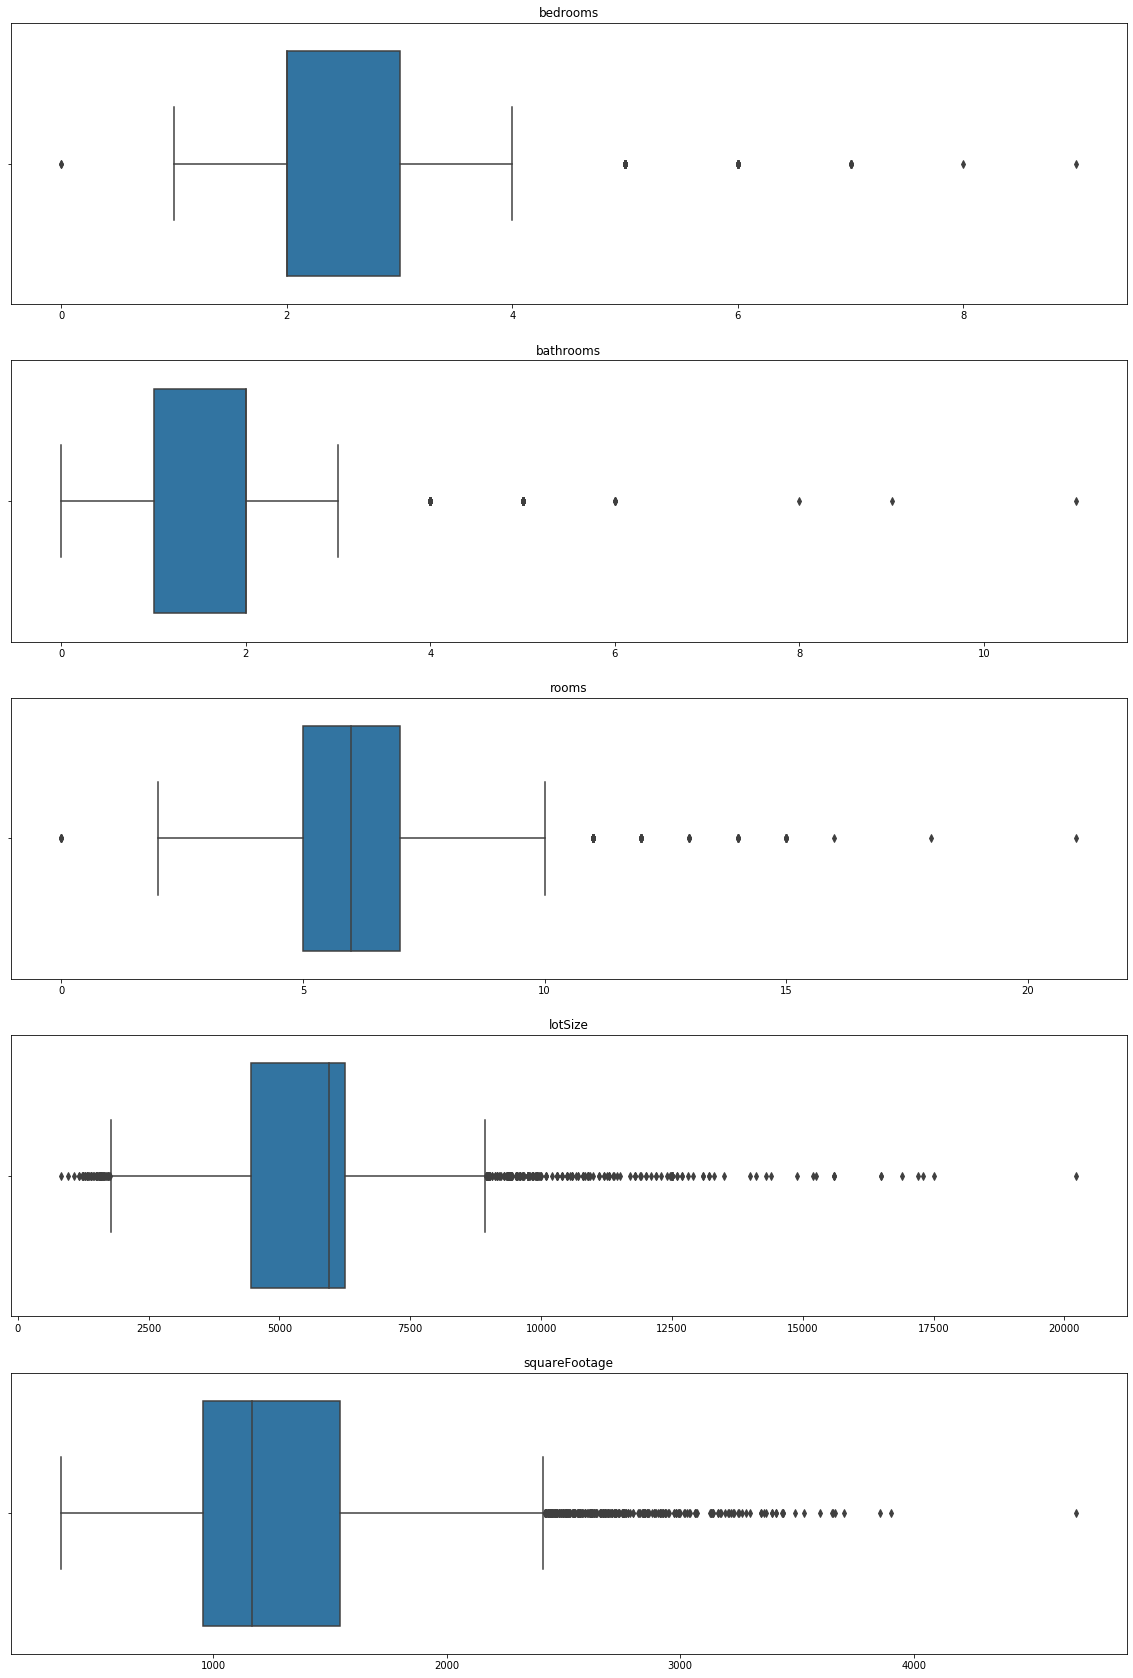

In [44]:
metrics = ["bedrooms", "bathrooms", "rooms", "lotSize", "squareFootage"]
axis_count = 0
fig, axs = plt.subplots(5,figsize = (20, 30))

for metric in metrics:
    sns.boxplot(X[[metric]], ax = axs[axis_count]).set_title(metric)
    axis_count = axis_count + 1
